In [1]:
%%bash
# The following line ensures that cell runs only in Google Colab
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
echo "You are running in colab, getting data"
wget -q https://github.com/paulyurlov/DataVisualization/archive/main.zip
unzip -qq main.zip DataVisualization-main/Data/*
rm -rf Data/ main.zip
cp -r DataVisualization-main/Data/. Data/
rm -rf DataVisualization-main/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import signal
from numpy.random import default_rng


plt.style.use("ggplot")

# Задание 1

In [3]:
# setup
step = 1000
tau = 2
t = np.arange(0, tau, 1 / step)


# f1
f = 50
A = 2
sig_1 = A * np.sin(2 * np.pi * f * t)


# f2
f = 47
A = 2.5
sig_2 = A * np.sin(2 * np.pi * f * t)

<AxesSubplot:title={'center':'Визуализация второго сигнала (sig_2)'}>

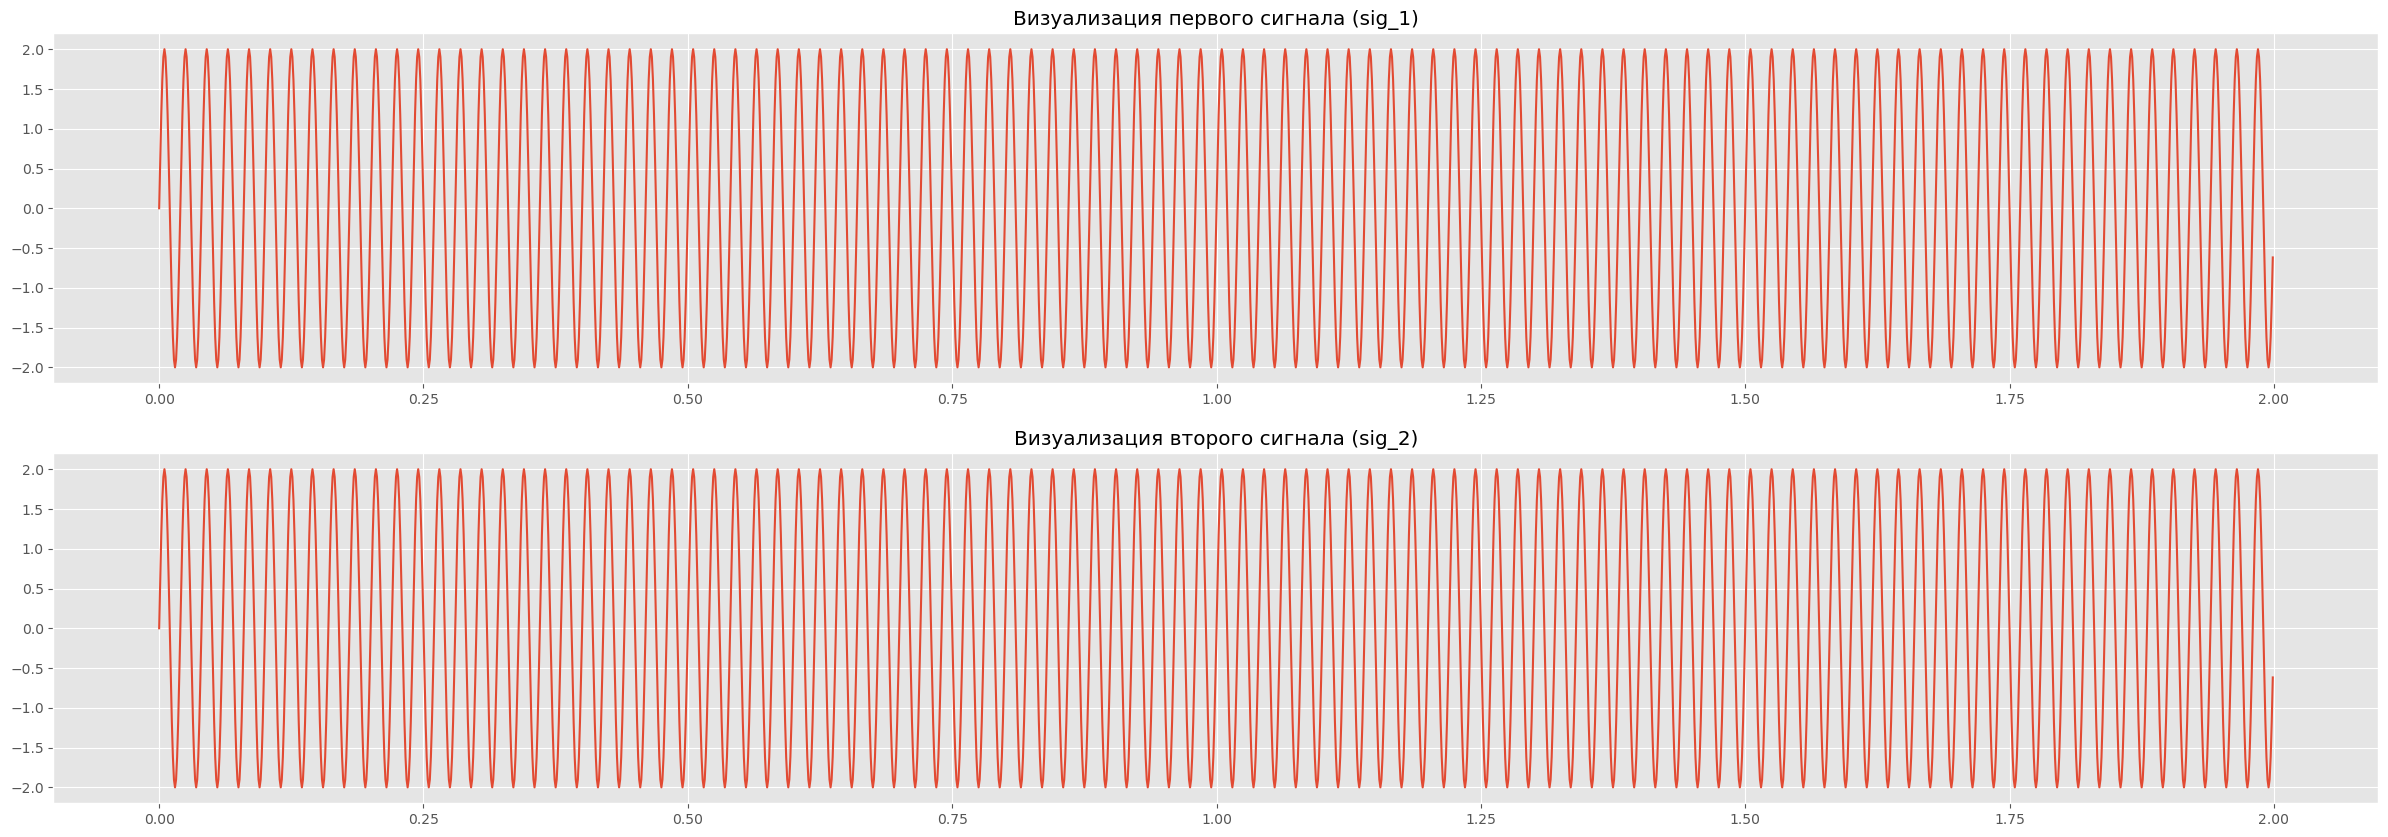

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(30, 10))

ax[0].set_title('Визуализация первого сигнала (sig_1)')
sns.lineplot(y=sig_1, x=t, ax=ax[0])
ax[1].set_title('Визуализация второго сигнала (sig_2)')
sns.lineplot(y=sig_1, x=t, ax=ax[1])

In [5]:
# Generate sin noise
f = 47 / 10
A = 2
sin_noise = A * np.sin(2 * np.pi * f * t)

In [6]:
# Nosify sig 1
sig_1_noise = sig_1 + sin_noise 


# Nosify sig 2
sig_2_noise = sig_2 + sin_noise 

<AxesSubplot:title={'center':'Визуализация второго сигнала (sig_2) с синусоидальным шумом'}>

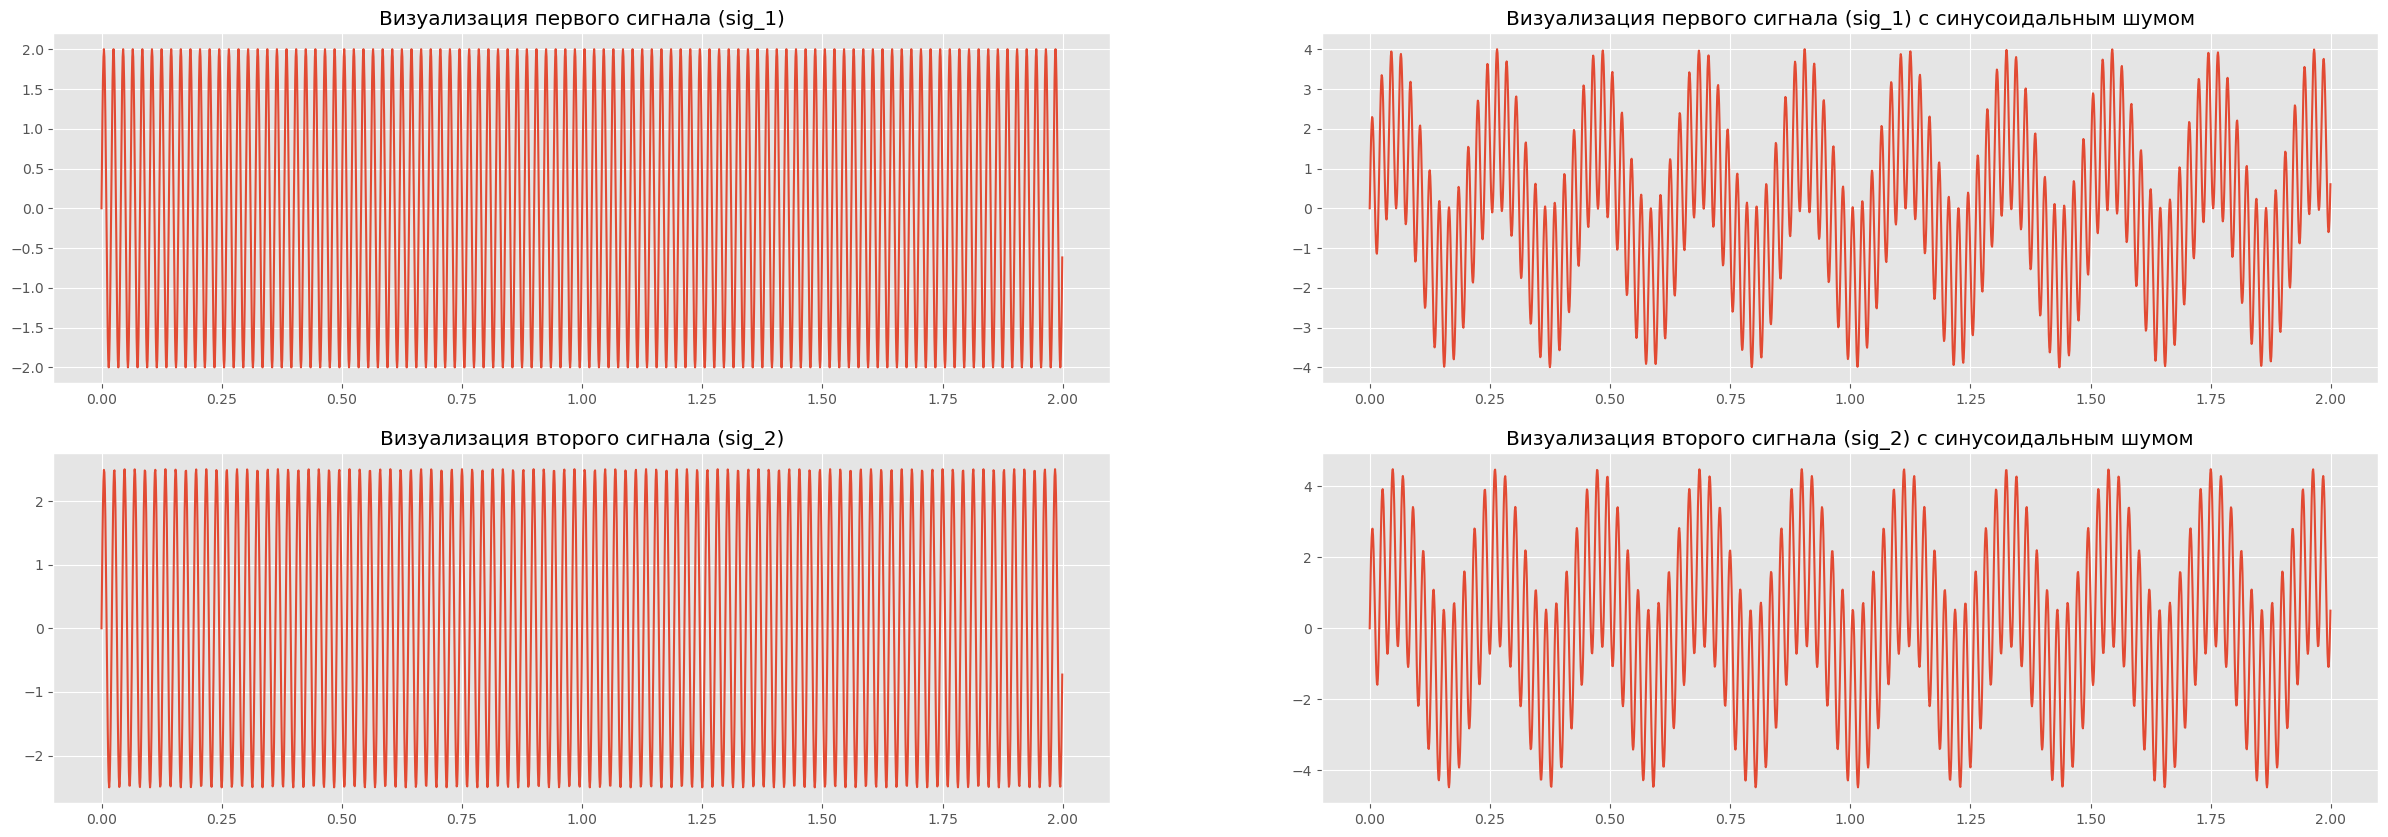

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

ax[0][0].set_title('Визуализация первого сигнала (sig_1)')
sns.lineplot(y=sig_1, x=t, ax=ax[0][0])

ax[0][1].set_title('Визуализация первого сигнала (sig_1) с синусоидальным шумом')
sns.lineplot(y=sig_1_noise, x=t, ax=ax[0][1])


ax[1][0].set_title('Визуализация второго сигнала (sig_2)')
sns.lineplot(y=sig_2, x=t, ax=ax[1][0])

ax[1][1].set_title('Визуализация второго сигнала (sig_2) с синусоидальным шумом')
sns.lineplot(y=sig_2_noise, x=t, ax=ax[1][1])


# Задание 2

In [8]:
df = pd.DataFrame({'sig_1_noise' : sig_1_noise, 'sig_2_noise' : sig_2_noise })
df

,sig_1_noise,sig_2_noise
0,0.000000,0.000000
1,0.677087,0.786644
2,1.293626,1.510244
3,1.794988,2.113212
4,2.137812,2.548392
...,...,...
1995,-0.599178,-1.088083
1996,-0.544050,-0.954630
1997,-0.303915,-0.622139
1998,0.093459,-0.123160


<AxesSubplot:title={'center':'Визуализация второго сигнала (sig_2) с простым скользящим средним'}, ylabel='sig_2_noise'>

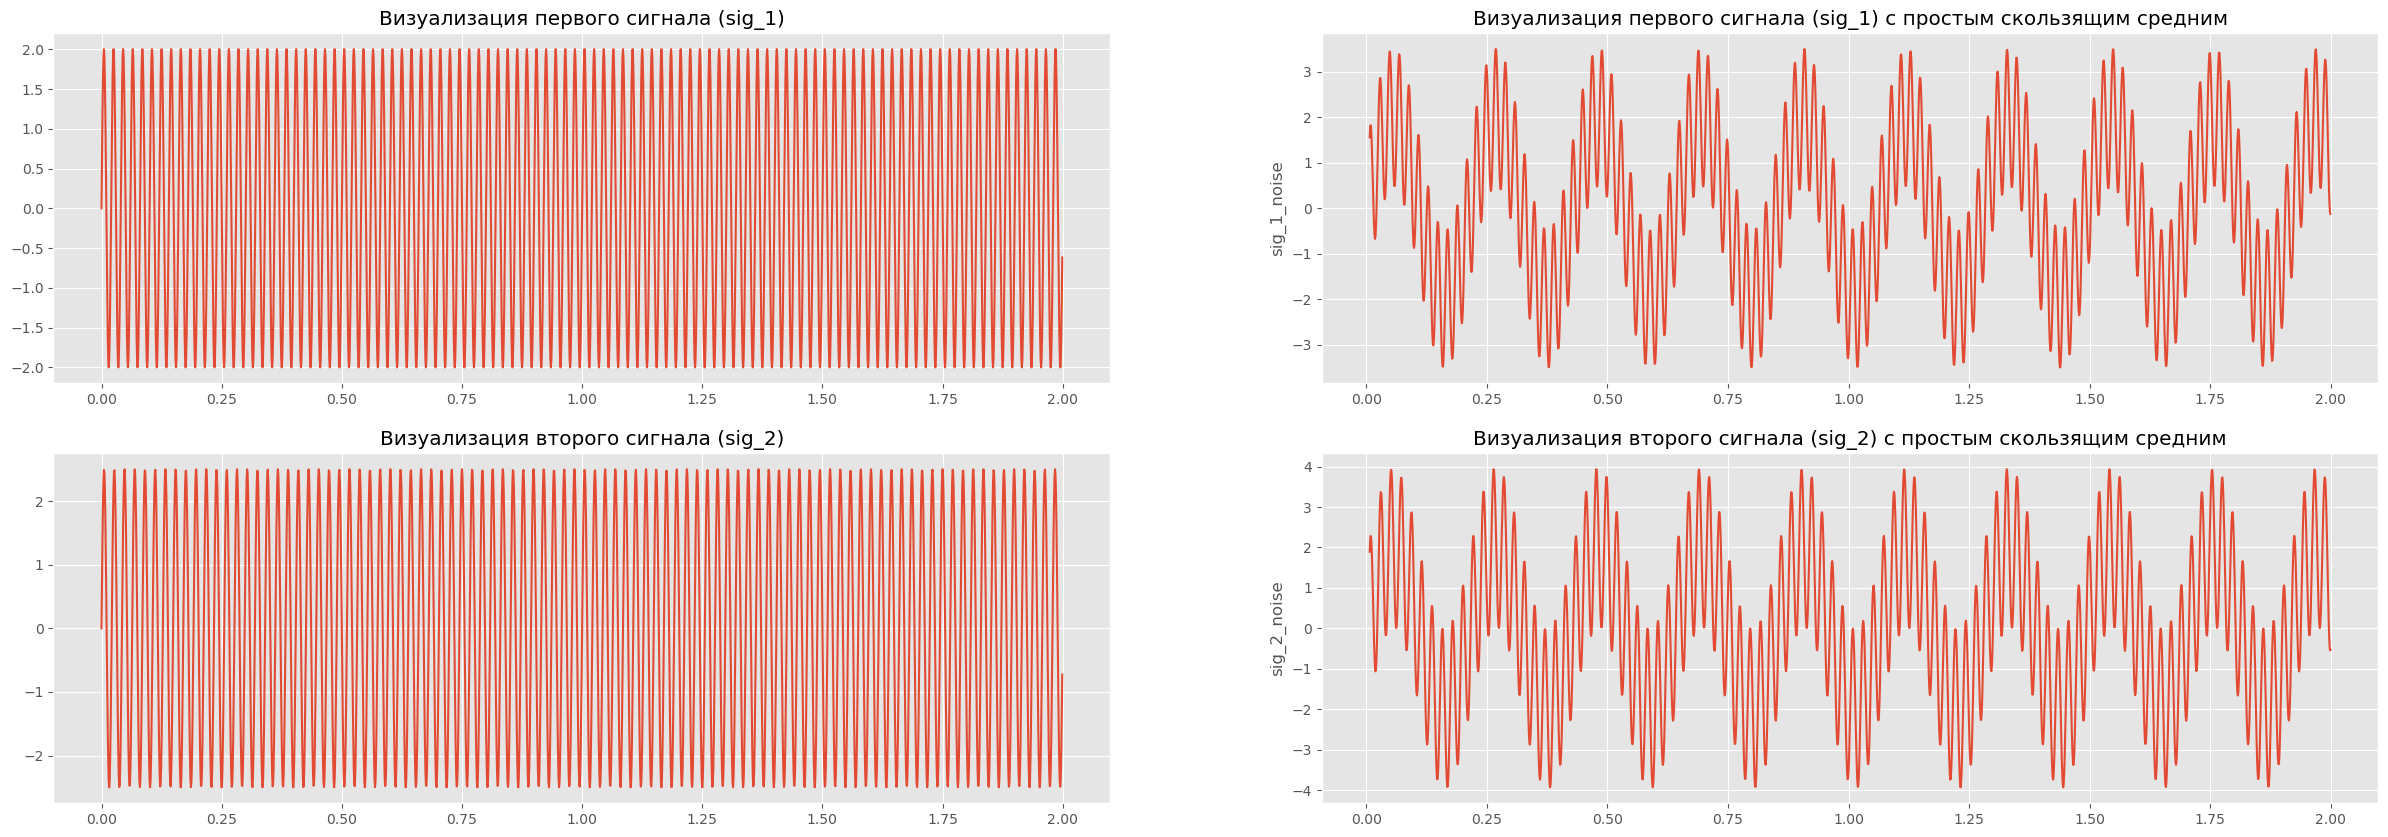

In [9]:
roll_df = df.rolling(window=8).mean()

fig, ax = plt.subplots(2, 2, figsize=(30, 10))

ax[0][0].set_title('Визуализация первого сигнала (sig_1)')
sns.lineplot(y=sig_1, x=t, ax=ax[0][0])

ax[0][1].set_title('Визуализация первого сигнала (sig_1) с простым скользящим средним')
sns.lineplot(y=roll_df.sig_1_noise, x=t, ax=ax[0][1])


ax[1][0].set_title('Визуализация второго сигнала (sig_2)')
sns.lineplot(y=sig_2, x=t, ax=ax[1][0])

ax[1][1].set_title('Визуализация второго сигнала (sig_2) с простым скользящим средним')
sns.lineplot(y=roll_df.sig_2_noise, x=t, ax=ax[1][1])


<AxesSubplot:title={'center':'Визуализация второго сигнала (sig_2) с экспоненциальным скользящим средним'}, ylabel='sig_2_noise'>

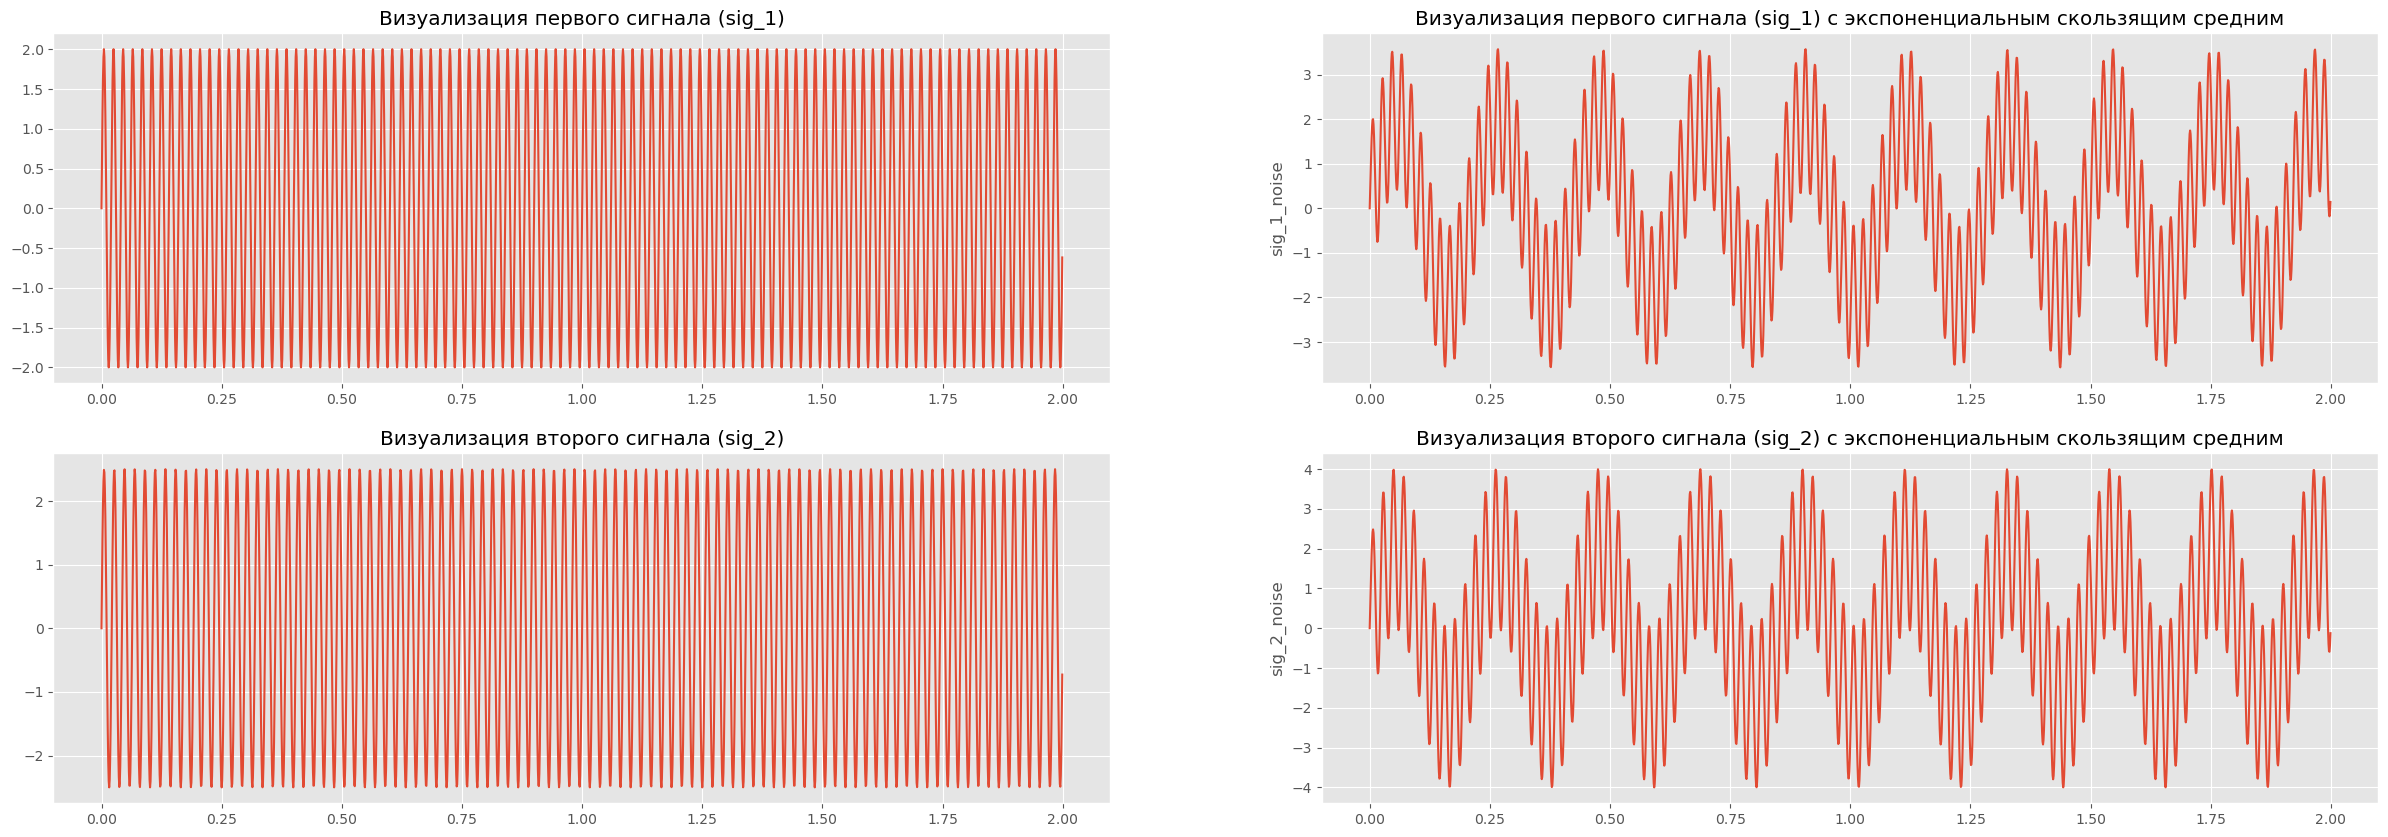

In [10]:
ewm_df = df.ewm(span=5).mean()

fig, ax = plt.subplots(2, 2, figsize=(30, 10))

ax[0][0].set_title('Визуализация первого сигнала (sig_1)')
sns.lineplot(y=sig_1, x=t, ax=ax[0][0])

ax[0][1].set_title('Визуализация первого сигнала (sig_1) с экспоненциальным скользящим средним')
sns.lineplot(y=ewm_df.sig_1_noise, x=t, ax=ax[0][1])


ax[1][0].set_title('Визуализация второго сигнала (sig_2)')
sns.lineplot(y=sig_2, x=t, ax=ax[1][0])

ax[1][1].set_title('Визуализация второго сигнала (sig_2) с экспоненциальным скользящим средним')
sns.lineplot(y=ewm_df.sig_2_noise, x=t, ax=ax[1][1])

<AxesSubplot:title={'center':'Визуализация второго сигнала (sig_2) с кумулятивным скользящим средним'}, ylabel='sig_2_noise'>

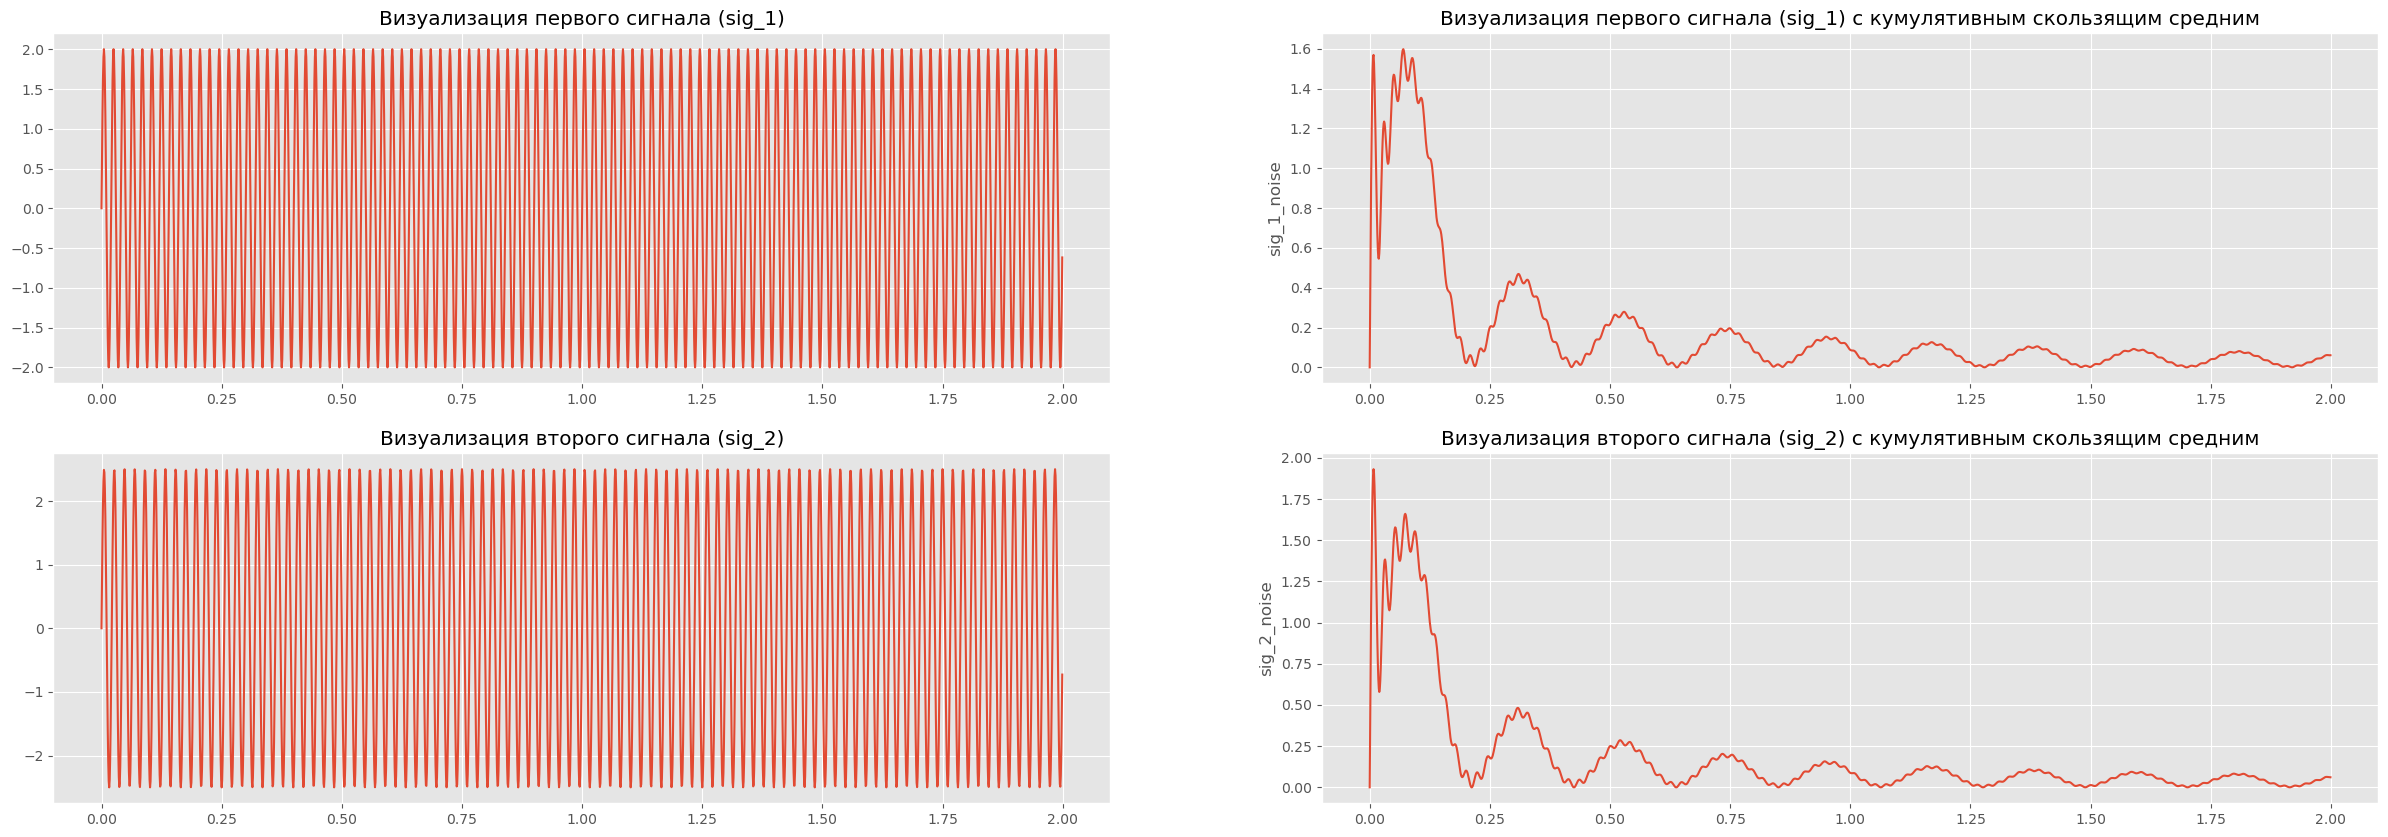

In [11]:
cum_df = df.expanding().mean()

fig, ax = plt.subplots(2, 2, figsize=(30, 10))

ax[0][0].set_title('Визуализация первого сигнала (sig_1)')
sns.lineplot(y=sig_1, x=t, ax=ax[0][0])

ax[0][1].set_title('Визуализация первого сигнала (sig_1) с кумулятивным скользящим средним')
sns.lineplot(y=cum_df.sig_1_noise, x=t, ax=ax[0][1])


ax[1][0].set_title('Визуализация второго сигнала (sig_2)')
sns.lineplot(y=sig_2, x=t, ax=ax[1][0])

ax[1][1].set_title('Визуализация второго сигнала (sig_2) с кумулятивным скользящим средним')
sns.lineplot(y=cum_df.sig_2_noise, x=t, ax=ax[1][1])

# Задание 3 - 4

In [12]:
df = pd.read_csv('Data/oscar_age_male.csv', quotechar='"',
                      skipinitialspace=True)
df = df[['Year', 'Age']]
df

,Year,Age
0,1928,44
1,1929,41
2,1930,62
3,1931,53
4,1932,47
...,...,...
84,2012,39
85,2013,55
86,2014,44
87,2015,33


In [13]:
df['Year_roll'] = df['Year'].rolling(window=2).mean()
df['Age_roll'] = df['Age'].rolling(window=2).mean()

df['Year_ewm'] = df['Year'].ewm(span=20).mean()
df['Age_ewm'] = df['Age'].ewm(span=20).mean()

df['Year_cum'] = df['Year'].expanding().mean()
df['Age_cum'] = df['Age'].expanding().mean()

<AxesSubplot:title={'center':'Визуализация expanding Age'}, xlabel='Age_cum', ylabel='Count'>

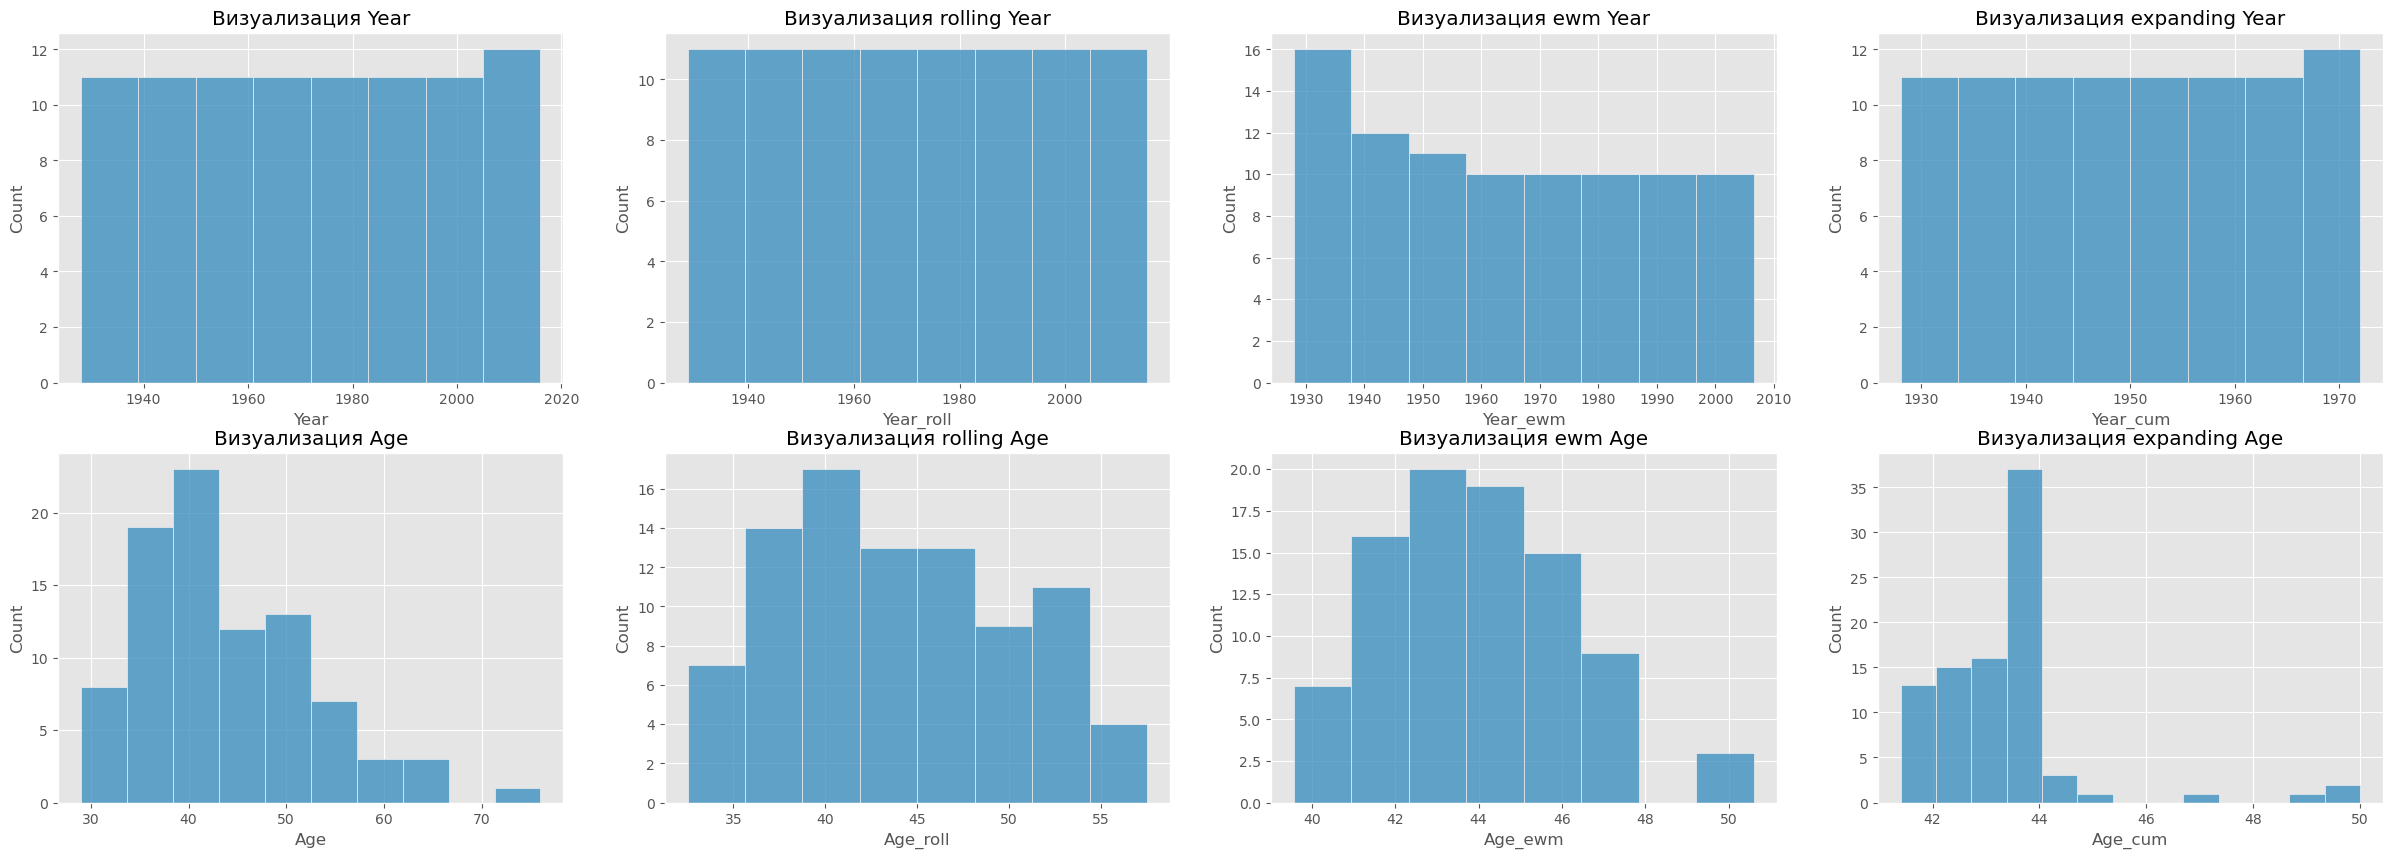

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(30, 10))


ax[0][0].set_title('Визуализация Year')
sns.histplot(x=df['Year'], ax=ax[0][0])

ax[0][1].set_title('Визуализация rolling Year')
sns.histplot(x=df['Year_roll'], ax=ax[0][1])

ax[0][2].set_title('Визуализация ewm Year')
sns.histplot(x=df['Year_ewm'], ax=ax[0][2])

ax[0][3].set_title('Визуализация expanding Year')
sns.histplot(x=df['Year_cum'], ax=ax[0][3])

ax[1][0].set_title('Визуализация Age')
sns.histplot(x=df['Age'], ax=ax[1][0])

ax[1][1].set_title('Визуализация rolling Age')
sns.histplot(x=df['Age_roll'], ax=ax[1][1])

ax[1][2].set_title('Визуализация ewm Age')
sns.histplot(x=df['Age_ewm'], ax=ax[1][2])

ax[1][3].set_title('Визуализация expanding Age')
sns.histplot(x=df['Age_cum'], ax=ax[1][3])
